# Introdução

&ensp; Neste notebook, é realizada uma análise utilizando algoritmos de clusterização, com foco no algoritmo K-Means, para identificar padrões da base de dados que contém o registro do uso do plano de saúde dos colaboradores da Unipar. O objetivo é agrupar dados com características semelhantes, no caso, traçar perfis de uso do convênio, permitindo uma melhor compreensão dos grupos que emergem naturalmente nos dados.

&ensp; Após a importação das bibliotecas necessárias é possível manipular e analisar os dados para que, em seguida, a base de dados seja preparada por meio da seleção das features mais relevantes para o processo de clusterização. A seguir, é determinado o número ideal de clusters, utilizando técnicas como o Elbow Method e o Índice de Silhueta, que ajudam a definir o valor mais adequado de "K" para o modelo.

&ensp; Com o número ideal de *clusters* definido, o algoritmo K-Means será aplicado sobre a base de dados preparada, agrupando os dados conforme suas semelhanças. Ao final, será realizada uma análise dos *clusters* obtidos, interpretando suas características e verificando os principais *insights* extraídos, destacando os padrões encontrados e possíveis implicações para a tomada de decisão.

## Importação de Bibliotecas

&ensp; Para realizar a análise de dados e aplicar o modelo K-means de maneira eficaz, diversas bibliotecas são essenciais no ambiente Python. Cada uma desempenha um papel específico, desde o carregamento e manipulação de dados até a visualização de resultados e avaliação do desempenho do modelo. As bibliotecas incluem ferramentas para análise numérica, construção de gráficos, codificação de dados categóricos e métricas de avaliação da separação dos grupos feitos, além de integração com o Google Colab para o acesso aos dados armazenados no Google Drive.

In [ ]:
import pandas as pd  # Manipulação de dados
import numpy as np  # Operações numéricas matriciais
import matplotlib.cm as cm # Escalas de cores
import matplotlib.pyplot as plt  # Gráficos estáticos
from sklearn.cluster import KMeans  # Algoritmo K-means
from sklearn.metrics import silhouette_samples, silhouette_score  # Avaliação de clusters
from sklearn.preprocessing import LabelEncoder  # Codificação de dados categóricos
import plotly.express as px  # Gráficos interativos

# K-means


&ensp; No que tange à parte preditiva do projeto com a Unipar, optou-se por utilizar um modelo não supervisionado. Esse tipo de abordagem permite encontrar padrões, até então desconhecidos, sem a manipulação de um humano. Ao contrário do aprendizado supervisionado, onde o modelo é treinado com exemplos de entrada e saída, o aprendizado não supervisionado trabalha com dados brutos e procura identificar padrões, relações ou estruturas individuais (ESCOVEDO, 2020).

&ensp; Existem diversos algoritmos de modelos não supervisionados que poderiam ser testados para o UniData, como o DBSCAN e o Ward. Entretanto, dado a familiaridade do grupo SGESP para com um desses algoritmos, o K-means, este foi escolhido como primeiro algoritmo a ser utilizado para geração do primeiro modelo candidato.

&ensp; O K-means é um algoritmo de clusterização que trabalha definindo conjuntos de dados em grupos (*clusters*) com base em suas características. A ideia principal é dividir um conjunto de pontos em um espaço multidimensional em K grupos, onde K representa um número de grupos pré-definido. Cada grupo é formado por pontos que estão mais próximos uns dos outros em comparação com pontos de outros grupos. O algoritmo trabalha com várias iterações em que se varia o centróide dos *clusters*. Sendo assim, o algoritmo minimiza a variação dentro de cada grupo, ou seja, os pontos dentro de um mesmo grupo serão o mais semelhantes possível, enquanto os grupos serão os mais diferentes entre si o quanto possível. (WONG, 1979; MEDIUM, 2020).

&ensp; Entretanto, para utilizar esse modelo é necessário pré-processar a base de dados codificando as variáveis categóricas, escolher as *features* mais significativas e, como mencionado, escolher um valor para o K. Enquanto o pré-processamento foi feito na sprint passada, os passos seguintes necessários para a aplicação do modelo estão expostos abaixo.

# Seleção de *Features* Ideais e Preparação da Base

&ensp; Ainda que a fase de preparação de dados já tenha sido concluída, algumas modificações pontuais são necessárias para garantir que o K-means gere *clusters* com padrões bem definidos e coerentes, maximizando a qualidade da análise. O objetivo aqui é selecionar as variáveis que melhor capturam as características relevantes dos colaboradores e seus sinistros, além de adaptá-las da melhor forma para aplicação deste modelo.

&ensp; Primeiro, é feito o carregamento da base original. Aqui, a base de dados é carregada no ambiente de trabalho a partir de um arquivo CSV. Essa base contém inclui mais de 40 colunas, incluindo variáveis numéricas e categóricas.


In [20]:
# Carrega um DataFrame a partir de um arquivo CSV localizado no caminho especificado
bd = pd.read_csv('bd_table.csv')

&ensp; Como o K-means trabalha exclusivamente com dados numéricos, é necessário converter colunas categóricas em números. Aqui, foi usado a instância LabelEncoder da biblioteca Scilit-Learn para transformar as categoria `faixa_etaria` em valore numérico, possibilitando que essa variável seja utilizada no modelo.

In [21]:
# Instância da classe LabelEncoder do scikit-learn, que é utilizada para converter rótulos de categorias em valores numéricos
label_encoder = LabelEncoder()

# Aplica o LabelEncoder à coluna 'faixa_etaria_colaborador_sinistro', convertendo categorias em valores numéricos e armazena o resultado na coluna 'faixa_etaria'
bd['faixa_etaria'] = label_encoder.fit_transform(bd['faixa_etaria_colaborador_sinistro'])


&ensp; Abaixo são selecionadas as variáveis mais relevantes para a análise com o K-means, levando em consideração diversos testes prévios e a qualidade dos clusters formados. As seguintes variáveis foram escolhidas:

- **codigo_prefixo:** Identifica de forma única diferentes categorias ou grupos dentro da empresa, sendo fundamental para segmentar os colaboradores em *clusters* com perfis distintos.
- **valor_pago_sinistro:** Esta variável captura o impacto financeiro dos sinistros, fornecendo uma medida direta do custo associado a cada colaborador, o que é essencial para diferenciar grupos de alto e baixo custo.
- **faixa_etaria:** A idade dos colaboradores influencia diretamente o tipo e frequência de sinistros, permitindo identificar tendências de saúde específicas para faixas etárias diferentes.
- **sexo_colaborador_sinistro:** O gênero pode ser um fator determinante em certos tipos de sinistros, ajudando a identificar padrões de sinistralidade específicos de cada sexo.
- **mes_ocorrencia:** Considerar a sazonalidade dos sinistros é crucial para capturar variações no comportamento dos colaboradores ao longo do tempo, como picos em certos meses.
- **quantidade:** Refere-se ao número de eventos associados a cada colaborador, o que é relevante para identificar padrões de uso do plano de saúde, ajudando a distinguir colaboradores com sinistros recorrentes.

&ensp; Essas variáveis foram escolhidas porque, juntas, forneceram uma visão abrangente dos diferentes perfis de colaboradores da Unipar, permitindo a formação de *clusters* significativos que factualmente refletem tanto aspectos demográficos quanto comportamentais e financeiros.

In [22]:
# Define a lista de características (features) que serão usadas para o modelo de clustering
features_escolhidas = [
    "codigo_prefixo",  # Identificador do prefixo
    "valor_pago_sinistro",  # Valor pago no sinistro
    "faixa_etaria",  # Faixa etária do colaborador
    "sexo_colaborador_sinistro",  # Sexo do colaborador no sinistro
    "mes_ocorrencia",  # Mês em que o sinistro ocorreu
    "quantidade"  # Quantidade de ocorrência do sinistro
]

# Cria um novo DataFrame contendo apenas as colunas selecionadas para a aplicação do K-means
df_modelo = bd[features_escolhidas]

&ensp; A escolha adequada das features foi um passo crítico para melhorar o desempenho do algoritmo K-means. Após várias iterações e testes, as variáveis selecionadas mostraram-se mais eficazes na formação de clusters significativos, permitindo uma análise mais precisa dos padrões de sinistralidade. Com essas *features* definidas, os próximos passos — desde a definição da melhor quantidade de *clusters* (K) até o treinamento do modelo — podem ser feitos.

# Definição do K ótimo

&ensp; O processo de agrupamento de dados, ou *clustering*, é parte de projetos de *machine learning*, especialmente para identificar padrões e segmentar grandes volumes de informações. Um dos métodos mais populares para essa tarefa é o K-Means, que requer a definição do número ideal de *clusters* (k). Neste contexto, o *Elbow Method* é utilizado como uma abordagem visual para determinar a quantidade de grupos, analisando a redução na dispersão dos *clusters* com o aumento de k. No entanto, este método pode ser complementado pelo *Silhouette Method*, que mede a coesão interna e a separação entre os grupos, oferecendo uma análise mais detalhada da qualidade dos *clusters* formados. A seguir, são discutidos esses métodos em detalhe para se chegar à conclusão do valor ideal de k para o projeto.

## *Elbow Method* (Método do Cotovelo)

&ensp; O *Elbow Plot*, conhecido como método do cotovelo, é uma técnica visual usada para determinar o número ideal de *clusters* (k) ao utilizar o algoritmo de K-means (RUSHIRAJSINH, 2023).
<!-- https://medium.com/@zalarushirajsinh07/the-elbow-method-finding-the-optimal-number-of-clusters-d297f5aeb189 -->

&ensp; O método do cotovelo trabalha com o conceito de *Within-Cluster Sum of Squares* (WCSS), que representa a soma das distâncias quadradas entre os pontos de dados e o centro do *cluster* ao qual pertencem. À medida que aumentamos o número de *clusters*, o WCSS tende a diminuir, pois os pontos de dados estão mais próximos dos centros de seus respectivos *clusters*. No entanto, chega um ponto em que a diminuição no WCSS se torna menos significativa com o aumento de K. Este ponto é denominado "cotovelo" porque, graficamente, a curva formada lembra um cotovelo, onde há uma inflexão que indica a quantidade ideal de *clusters*. Matematicamente, esse é o ponto onde o equilíbrio entre a homogeneidade dentro dos *clusters* e a diferenciação entre eles é alcançado (TEMPORAL, 2019).
<!-- https://medium.com/pizzadedados/kmeans-e-metodo-do-cotovelo-94ded9fdf3a9 -->

<div align="center">
  <sub>Figura X - Ilustração do Elbow PLot</sub>

  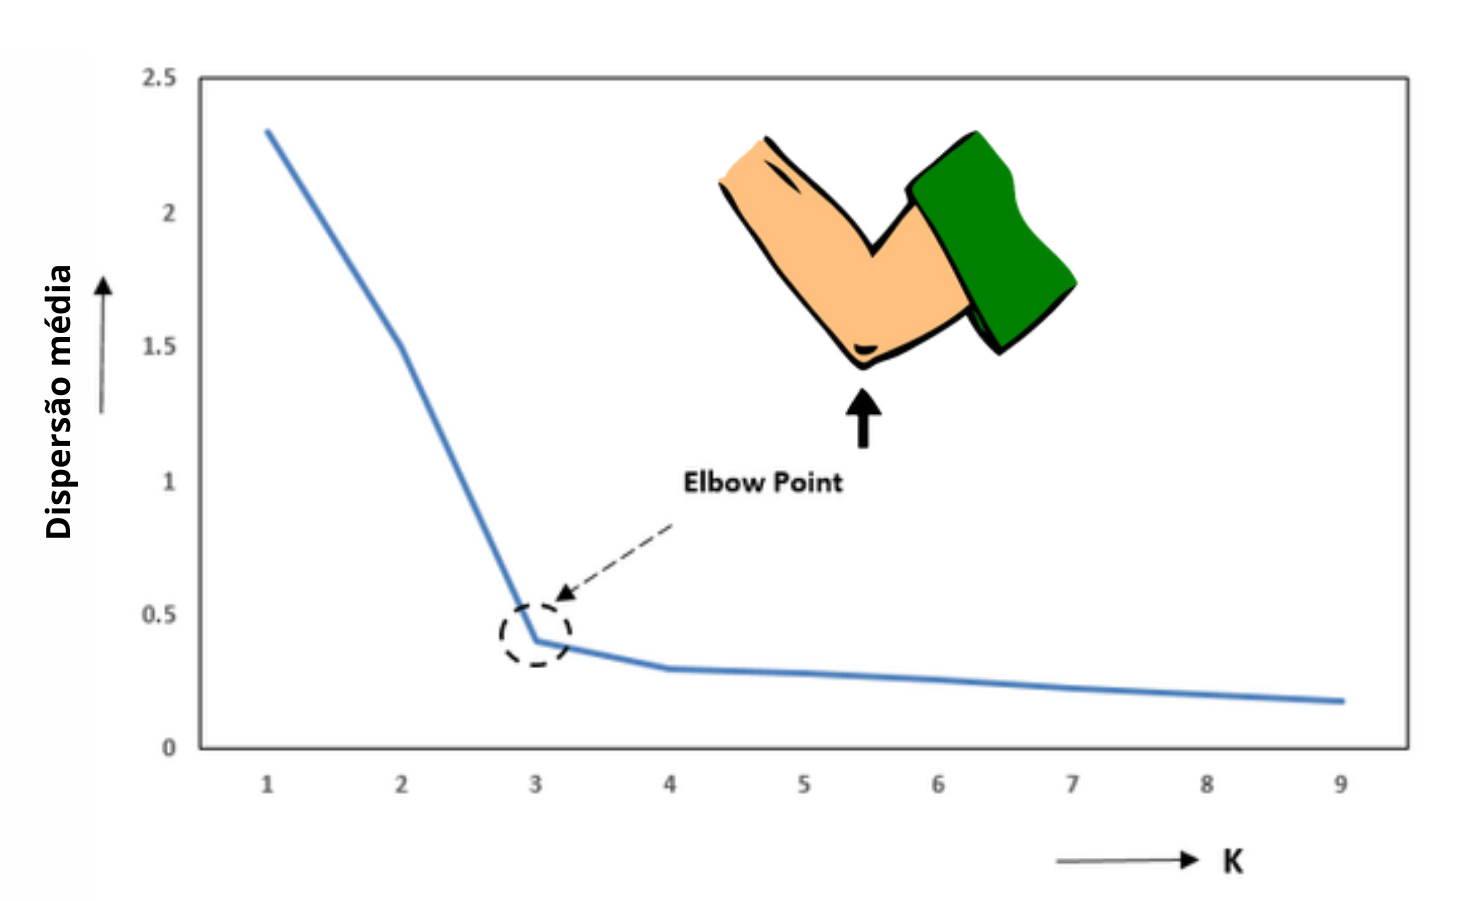

  <sup>Fonte: Material elaborado pelos autores (2024).</sup>
</div>

&ensp; Após identificar o ponto do cotovelo no gráfico, é possível determinar o número ótimo de *clusters*. Essa escolha é essencial para garantir que as observações dentro de cada agrupamento sejam o mais homogêneas possível, enquanto os *clusters* formados são significativamente distintos entre si. Dessa forma, o método do cotovelo ajuda a evitar tanto a subsegmentação quanto a supersegmentação dos dados, proporcionando uma base sólida para análises posteriores em projetos de *machine learning* (RUSHIRAJSINH, 2023; TEMPORAL, 2019).

&ensp; O código a seguir utiliza o método do Elbow Plot com a base `df_modelo` que encontra-se preparada para aplicação no algoritmo K-Means. Ele configura o K-Means com parâmetros específicos, calcula a inércia (soma das distâncias quadradas dentro dos *clusters*) para diferentes valores de K, de 1 a 7, e armazena os resultados em uma lista. Em seguida, os valores são plotados em um gráfico que mostra a dispersão dos *clusters*, permitindo visualizar o ponto de inflexão onde o aumento no número de *clusters* deixa de reduzir significativamente a inércia, sugerindo o número ótimo de *clusters*.

In [ ]:
# Define os parâmetros do algoritmo KMeans
kmeans_config = {
    "init": "random",  # Método de inicialização dos centróides
    "n_init": 10,  # Número de vezes que o algoritmo será executado com diferentes inicializações
    "random_state": 0,  # Semente para garantir a reprodutibilidade dos resultados
}

# Lista para armazenar os valores da soma dos quadrados das distâncias dos pontos aos centróides (SSE)
sse = []
# Calcula o SSE para diferentes números de clusters (k) de 1 a 7
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, **kmeans_config)  # Cria uma instância do KMeans com k clusters
    kmeans.fit(df_modelo)  # Ajusta o modelo aos dados
    sse.append(kmeans.inertia_)  # Adiciona o SSE (inertia_) à lista

# Plota os resultados para encontrar o valor ideal de k (método do cotovelo)
plt.plot(range(1, 8), sse, marker='o')  # Plota SSE contra o número de clusters

# Define o ponto do cotovelo (k = 3) baseado na análise visual
elbow_k = 3
elbow_sse = sse[elbow_k - 1]  # Ajusta o índice para a lista, já que o range começa em 1

# Adiciona um ponto vermelho para indicar o cotovelo
plt.plot(elbow_k, elbow_sse, 'ro', markersize=10, label=f'Cotovelo no k={elbow_k}')

# Adiciona rótulos e título ao gráfico
plt.xticks(range(1, 8))  # Define os ticks do eixo X
plt.xlabel("Número de Clusters (K)")  # Rótulo do eixo X
plt.ylabel("Dispersão dos Clusters (WCSS)")  # Rótulo do eixo Y
plt.title("Visualização Elbow Plot para k clusters em KMeans")  # Título do gráfico
plt.legend()  # Adiciona a legenda
plt.show()  # Exibe o gráfico

&ensp;O método do cotovelo, conforme apresentado, é uma técnica para determinar o número ideal de clusters, o qual se expressa no gráfico acima como k = 3. No entanto, em muitos conjuntos de dados do mundo real, como o que estamos trabalhando, a curva do cotovelo pode não ser suficiente para identificar o número adequado de grupos. Nessas situações, é recomendado complementar a análise com o *silhouette plot*, que permite avaliar a qualidade do agrupamento, ajudando a definir o número ideal de forma mais robusta (TOMAR, 2023). A seguir, aplicamos o método da silhueta para validar o número de clusters para o modelo em questão.

## *Silhouette* (Método da Silhueta)

&ensp;O método da silhueta é uma técnica utilizada para avaliar a qualidade dos *clusters* gerados por algoritmos de aprendizado não supervisionado, como o K-means. Seu propósito é medir o quão bem os dados foram agrupados, considerando tanto a proximidade dos pontos dentro de um mesmo *cluster* quanto a separação em relação aos demais *clusters*. No contexto deste projeto, essa análise é importante para validar a escolha do número de grupos, garantindo que os dados estejam organizados de maneira coesa e claramente segmentada.

&ensp;Durante o processo de validação de *clusters*, a análise por silhueta demonstra robusta performance quando comparado aos outros métodos de validação em predições não-supervisionadas (MAMAT et al., 2018). Este método aponta quais objetos se encontram dentro dos agrupamentos e quais foram erroneamente classificados pelo algoritmo.

&ensp;Esta análise é fundada em dois termos principais:

* **Coesão:** diz respeito à distância média de um ponto específico a outros dentro de um mesmo *cluster*, refletindo a relação entre o ponto estudado aos demais pontos da mesma aglomeração.

* **Separação:** representa a distância média entre um ponto específico e todos os pontos do *cluster* mais próximo. Portanto, apresenta a distância média entre o ponto escolhido e a aglomeração mais próxima que não a que o próprio ponto pertence.

&ensp;Em modelos K-means, a análise de silhueta é utilizada para validação do termo k de *clusters*, analisando a plotagem de um gráfico com os cálculos do coeficiente de silhueta, dado pela fórmula abaixo:

<div align="center">

  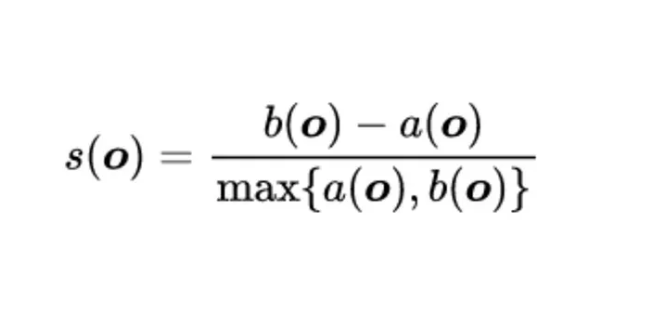

</div>

&ensp;Onde:

* **S(o):** coeficiente de silhueta;
* **a(o):** coesão entre termos do mesmo *cluster*;
* **b(o):** separação entre termos de diferentes *clusters*.

&ensp;A resultante _S(i)_ é passível de assumir valores de -1 a 1. O valor de coeficiente igual a 1 indica que o ponto observado se encontra corretamente agrupado no *cluster* em que se encontra. De maneira análoga, um ponto de coeficiente de silhueta igual a -1 indica um ponto erroneamente agrupado. Se a análise mostrar que muitos pontos têm valores baixos ou negativos, isso pode indicar que o número de *clusters* k escolhido não é apropriado e pode precisar ser ajustado.

&ensp; O código a seguir aplica o *silhouette* para avaliar a qualidade dos clusters gerados pelo algoritmo K-Means ao testar diferentes valores de k, variando de 2 a 10. O objetivo é identificar o número ideal de clusters que proporciona a melhor separação e coesão entre os pontos, com base na pontuação média de silhueta para cada valor de k. Ao final, os resultados são plotados em um gráfico.

In [ ]:
# Lista para armazenar os valores das pontuações de silhueta para diferentes números de clusters
silhouette_scores = []
# Define os números de clusters a serem testados (de 2 a 10)
k_values = range(2, 10)

# Define os parâmetros do algoritmo KMeans
kmeans_config = {
    "init": "random",  # Método de inicialização dos centróides
    "n_init": 10,  # Número de vezes que o algoritmo será executado com diferentes inicializações
    "random_state": 0,  # Semente para garantir a reprodutibilidade dos resultados
}

# Calcula a pontuação de silhueta para cada valor de k
for k in k_values:
    kmeans = KMeans(n_clusters=k, **kmeans_config)  # Cria uma instância do KMeans com k clusters
    cluster_labels = kmeans.fit_predict(df_modelo)  # Ajusta o modelo e prevê os rótulos dos clusters
    silhouette_avg = silhouette_score(df_modelo, cluster_labels)  # Calcula a pontuação média de silhueta
    silhouette_scores.append(silhouette_avg)  # Adiciona a pontuação à lista

# Plota a pontuação de silhueta para cada número de clusters
plt.plot(k_values, silhouette_scores, 'bx-')  # Plota a pontuação de silhueta contra o número de clusters
plt.xlabel('Número de clusters (k)')  # Rótulo do eixo X
plt.ylabel('Pontuação de Silhueta')  # Rótulo do eixo Y
plt.title('Análise de Silhueta para encontrar o número ótimo de k')  # Título do gráfico

# Adiciona uma linha vertical para indicar o número ótimo de clusters
plt.axvline(x=6, color='r', linestyle='--', label='K ótimo')

# Adiciona a legenda e exibe o gráfico
plt.legend()
plt.show()

&ensp; Conforme o gráfico gerado, a maior pontuação de silhueta se dá para k = 6. Logo, por meio dessa visualização, o k = 3, como sugerido pelo método do *elbow plot*, não é tido como o número ideal de *clusters*.

&ensp; Nesse sentido, para maior compreesão, no código abaixo, são analisados os resultados de agrupamento com K-Means para dois valores de clusters: 3 e 6\. O objetivo é gerar dois gráficos para cada valor de *k* - um gráfico de silhueta e outro de visualização dos *clusters* formados. Para cada valor de *k*, o código plota um gráfico que indica visualmente como os dados estão agrupados e, ao lado, exibe a distribuição dos pontos no espaço de características. Além disso, o gráfico marca os centros dos *clusters* e realça a linha vertical que representa a pontuação média de silhueta calculada previamente.

In [ ]:
# Define os números de clusters a serem analisados
range_n_clusters = [3, 6]

# Para cada número de clusters em range_n_clusters
for n_clusters in range_n_clusters:
    # Cria uma figura com 1 linha e 2 colunas para os subplots
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)  # Define o tamanho da figura

    # Configura o primeiro subplot para o gráfico de silhueta
    ax1.set_xlim([-0.1, 1])  # Define o limite do eixo X
    ax1.set_ylim([0, len(df_modelo) + (n_clusters + 1) * 10])  # Define o limite do eixo Y

    # Inicializa o KMeans com o número atual de clusters
    clusterer = KMeans(n_clusters=n_clusters, **kmeans_config)
    cluster_labels = clusterer.fit_predict(df_modelo)  # Ajusta o modelo e prevê os rótulos dos clusters

    # Calcula a média da pontuação de silhueta para o número atual de clusters
    silhouette_avg = silhouette_scores[n_clusters - 2]
    print(f"Para n_clusters = {n_clusters}, a média da pontuação de silhueta é: {silhouette_avg}")

    # Calcula as pontuações de silhueta para cada amostra
    sample_silhouette_values = silhouette_samples(df_modelo, cluster_labels)

    y_lower = 10  # Posição inicial no eixo Y para o gráfico de silhueta
    for i in range(n_clusters):
        # Agrega e ordena as pontuações de silhueta para as amostras pertencentes ao cluster i
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]  # Tamanho do cluster
        y_upper = y_lower + size_cluster_i  # Posição superior no eixo Y

        color = cm.nipy_spectral(float(i) / n_clusters)  # Cor para o cluster i
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Adiciona rótulo ao gráfico de silhueta com o número do cluster
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # Atualiza y_lower para o próximo gráfico

    ax1.set_title(f"Gráfico de Silhueta para {n_clusters} clusters")  # Título do gráfico
    ax1.set_xlabel("Valores do coeficiente de silhueta")  # Rótulo do eixo X
    ax1.set_ylabel("Rótulo do cluster")  # Rótulo do eixo Y

    # Adiciona uma linha vertical para a média do coeficiente de silhueta
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Remove os rótulos do eixo Y
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])  # Define os ticks do eixo X

    # Segundo gráfico mostrando os clusters formados
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)  # Cores para os clusters
    ax2.scatter(df_modelo.iloc[:, 0], df_modelo.iloc[:, 1], marker=".", s=30, lw=0,
                alpha=0.7, c=colors, edgecolor="k")  # Plota os pontos dos dados

    # Plota os centros dos clusters
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker="o", c="white", alpha=1, s=200, edgecolor="k")

    # Rotula os centros dos clusters com o número do cluster
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker=f"${i}$", alpha=1, s=50, edgecolor="k")

    ax2.set_title(f"Visualização dos dados agrupados com {n_clusters} clusters")  # Título do gráfico
    ax2.set_xlabel("Espaço da 1ª característica")  # Rótulo do eixo X
    ax2.set_ylabel("Espaço da 2ª característica")  # Rótulo do eixo Y

    # Título geral para os subplots
    plt.suptitle(f"Análise de Silhueta para K-Means com {n_clusters} clusters", fontsize=14, fontweight="bold")

# Exibe os gráficos
plt.show()

*Os gráficos de silhueta utilizados foram gerados com base na documentação do Scikit-learn (SCIKIT-LEARN, 2024).*

&ensp;Dessa forma, identificou-se que o número ideal de clusters para o modelo K-Means é k = 6, por apresentar a melhor combinação de coesão e separação entre os dados. Conforme recomendado, é importante complementar a análise do *elbow plot* com o *silhouette plot*, que avalia a qualidade do agrupamento de forma mais detalhada. Ainda, o gráfico da silhueta, por meio da avaliação de coesão interna dos grupos e separação entre eles, proporciona uma visão mais confiável do que a análise do cotovelo sozinha. Por isso, o método de silhueta é frequentemente considerado mais confiável que o *elbow plot* para definir o número ótimo de *clusters* (TOMAR, 2023). Na análise do projeto, a silhueta comprovou que, comparativamente, k = 6 apresenta uma performance superior a k = 3, refutando o resultado anterior.

## Conclusão

In [26]:
k_otimo = 6

&ensp;Com base na aplicação dos métodos do cotovelo e da silhueta, foi possível identificar que o número de *clusters* mais adequado para o modelo K-Means neste projeto é k = 6. Embora o *Elbow Plot* tenha inicialmente sugerido k = 3 como uma opção viável, a análise mais detalhada pelo *Silhouette Plot* demonstrou que k = 6 oferece uma melhor combinação de coesão e separação entre os dados. Essa escolha é importante para garantir uma segmentação mais robusta e precisa, evitando a formação de grupos subótimos e melhorando a qualidade das previsões feitas pelo modelo.

# Aplicação da Base no K-means

&ensp; Após a validação dos *clusters* através das técnicas *Elbow Plot* e *Silhuette Score* em nossa base de dados tratada, aplica-se o algoritmo K-Means com parâmetro de `k_otimo` = 6, encontrado através das validações citadas. Desta forma, o modelo será treinado para identificar agrupamentos nos dados com o objetivo de realçar padrões relevantes entre features de maneira eficiente.

In [36]:
# Treina o modelo KMeans com o número ótimo de clusters
kmeans_otimo = KMeans(n_clusters=k_otimo, **kmeans_config).fit(df_modelo)

# Obtém os rótulos (labels) dos clusters atribuídos a cada ponto
labels = kmeans_otimo.labels_

# Adiciona a coluna "Cluster" ao DataFrame df_modelo com o número do cluster atribuído a cada linha
df_modelo.loc[:, 'Cluster'] = labels + 1  # Adiciona 1 aos labels para ajustar a numeração de 0-5 para 1-6

&ensp;Com a aplicação do código acima, a clusterização dos dados toma forma. Sua distribuição é mostrada no gráfico gerado pelo código abaixo:

In [ ]:
# Conta o número de pontos em cada cluster e ordena os clusters pelo índice
cluster_counts = df_modelo['Cluster'].value_counts().sort_index()

# Obtém os rótulos dos clusters (números dos clusters)
cluster_labels = cluster_counts.index.tolist()

# Define as cores para cada cluster
cores_clusters = {
    1: '#0072B2',  # Cluster 1: Azul
    2: '#E69F00',  # Cluster 2: Laranja
    3: '#009E73',  # Cluster 3: Verde
    4: '#D55E00',  # Cluster 4: Vermelho
    5: '#CC79A7',  # Cluster 5: Roxo
    6: '#F0E442'   # Cluster 6: Amarelo
}

# Cria o gráfico de barras
plt.figure(figsize=(10, 6))  # Define o tamanho da figura
bars = plt.bar(cluster_labels, cluster_counts, color=[cores_clusters.get(cluster, '#333333') for cluster in cluster_labels])

# Adiciona os números em cima de cada barra
for bar in bars:
    height = bar.get_height()  # Obtém a altura da barra
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}',
             ha='center', va='bottom', fontsize=12)  # Adiciona o texto no centro da barra

# Configurações do gráfico
plt.xlabel('Cluster')  # Rótulo do eixo X
plt.ylabel('Número de Pontos')  # Rótulo do eixo Y
plt.title('Distribuição de Linhas por Cluster')  # Título do gráfico
plt.xticks(cluster_labels)  # Define os ticks do eixo X como os rótulos dos clusters
plt.grid(axis='y')  # Adiciona uma grade horizontal para o eixo Y

# Exibe o gráfico
plt.show()

&ensp;Conclui-se que, através do processo de agrupamento dos dados através do modelo K-Means utilizando o parâmetro k = 6, os *clusters* formados possuem volume satisfatório e definições claras, fundamentais para uma eficiente análise dos agrupamentos e futuras gerações de *insights*.

# Análise dos *Clusters*

&ensp; Para entender a separação dos *clusters*, diversas estratégias podem ser aplicadas. Inicialmente, optou-se por utilizar uma matriz contendo gráficos de dispersão em cada célula, que permite visualizar a diferença entre os *clusters* por meio das variações de coloração. Essa abordagem ajuda a relacionar as variáveis e compreender as relações utilizadas na clusterização. A visualização considera as seguintes dimensões: `codigo_prefixo`, `valor_pago_sinistro`, `faixa_etaria`, `sexo_colaborador_sinistro`, `mes_ocorrencia` e `quantidade`. As cores representam os diferentes *clusters*.

In [ ]:
# Cria um gráfico de matriz de dispersão usando a biblioteca Plotly Express
grafico = px.scatter_matrix(
    df_modelo,  # DataFrame que contém os dados para o gráfico
    title='Matriz de Gráficos de Dispersão',  # Título do gráfico
    dimensions=['codigo_prefixo', 'valor_pago_sinistro', 'faixa_etaria', 'sexo_colaborador_sinistro', 'mes_ocorrencia', 'quantidade'],  # Colunas do DataFrame que serão usadas para criar os gráficos de dispersão
    color='Cluster',  # Coluna que será usada para colorir os pontos, indicando o cluster a que pertencem
    height=1000,  # Altura do gráfico em pixels
)

# Exibe o gráfico na tela
grafico.show()

&ensp; A partir da análise dos gráfico, é possível identificar quais variáveis tiveram maior e menor influência na formação dos *clusters*. A visualização revela que a categoria do sinistro foi a variável mais relevante para a clusterização, destacando-se como um fator chave na formação dos grupos. Em seguida, o valor pago pelo sinistro também desempenhou um papel significativo, embora com um impacto menor em comparação à categoria do sinistro. Além disso, a variável quantidade mostrou-se relevante na segmentação dos *clusters*, contribuindo para diferenciar ainda mais os grupos identificados.

&ensp; Com esse entendimento, decide-se aprofundar a análise nas variáveis de maior impacto: categoria do sinistro, valor pago pelo sinistro e quantidade, para explorar mais detalhadamente como cada uma contribui para a formação dos *clusters*.

In [ ]:
# Cria um gráfico de dispersão 3D usando a biblioteca Plotly Express
grafico_3d = px.scatter_3d(
    df_modelo,  # DataFrame que contém os dados para o gráfico
    x='codigo_prefixo',  # Coluna do DataFrame a ser usada no eixo X
    y='valor_pago_sinistro',  # Coluna do DataFrame a ser usada no eixo Y
    z='quantidade',  # Coluna do DataFrame a ser usada no eixo Z
    color='Cluster',  # Coluna que será usada para colorir os pontos, indicando o cluster a que pertencem
    title='Gráfico 3D de Categoria, Valor Pago e Quantidade por Cluster',  # Título do gráfico
    labels={  # Rótulos personalizados para os eixos
        'codigo_prefixo': 'Categoria',  # Nome amigável para o eixo X
        'valor_pago_sinistro': 'Valor Pago',  # Nome amigável para o eixo Y
        'quantidade': 'Quantidade'  # Nome amigável para o eixo Z
    },
    width=800,  # Largura do gráfico em pixels
    height=600,  # Altura do gráfico em pixels
)

# Exibe o gráfico na tela
grafico_3d.show()

&ensp; A partir da análise gráfica, percebe-se o papel determinante do `codigo_prefixo` (categoria) na formação dos *clusters*, pois ele indica a categoria à qual cada sinistro pertence. A visualização mostra que os *clusters* são formados com base nos prefixos dos códigos: "1", "2", "3", "4", "5", e "8" ou maiores. Essa segmentação ocorre da seguinte maneira:

- **Cluster 1:** Representa códigos de prefixo iniciados em "8", relacionados a atendimentos emergenciais ou odontológicos.
- **Cluster 2:** Inclui códigos de prefixo iniciados em "3", que se referem a procedimentos cirúrgicos.
- **Cluster 3:** Abrange códigos de prefixo iniciados em "1", associados a procedimentos gerais e custos hospitalares.
- **Cluster 4:** Contém códigos de prefixo iniciados em "5", que correspondem a serviços agregados da medicina, como psicologia e fisioterapia.
- **Cluster 5:** Envolve códigos de prefixo iniciados em "4", ligados a procedimentos de diagnóstico.
- **Cluster 6:** Refere-se aos códigos de prefixo iniciados em "2", relacionados a procedimentos clínicos.

&ensp; A análise também destaca que os **Clusters 2** (procedimentos cirúrgicos) e **3** (procedimentos gerais e custos hospitalares) têm, em média, os maiores valores pagos, sugerindo que esses tipos de sinistros estão associados a custos mais elevados. Em contraste, o **Cluster 6** (procedimentos clínicos) se distingue por apresentar o maior número de ocorrências, indicando que esses procedimentos são os mais frequentes entre os sinistros analisados.

&ensp; Essas observações ajudam a entender melhor como cada tipo de sinistro influencia a segmentação dos *clusters*, oferecendo uma visão mais detalhada da distribuição dos dados.

## Comparação da Quantidade de Sexo por Cluster

&ensp; Após identificar a influência e o comportamento das *features* que mais impactam a formação dos *clusters*, opta-se por analisar individualmente as demais *features*. O objetivo é entender melhor como os *clusters* se distribuem em relação a essas variáveis, proporcionando uma visão mais detalhada de cada grupo em diferentes dimensões.

In [ ]:
# Criação de uma cópia do DataFrame original para manipulação sem alterar o original
df_grafico_sexo = df_modelo.copy()

# Substituir os valores numéricos de sexo por strings mais descritivas
df_grafico_sexo['sexo_colaborador_sinistro'] = df_grafico_sexo['sexo_colaborador_sinistro'].replace({0: 'Masculino', 1: 'Feminino'})

# Cria um histograma para comparar a quantidade de sexo por cluster
grafico_contagem = px.histogram(
    df_grafico_sexo,  # DataFrame contendo os dados para o gráfico
    x='sexo_colaborador_sinistro',  # Coluna do DataFrame que será usada no eixo X
    color='Cluster',  # Coluna que será usada para colorir as barras, indicando o cluster a que pertencem
    barmode='group',  # Modo de exibição das barras, agrupadas por cluster
    title='Comparação da Quantidade de Sexo por Cluster',  # Título do gráfico
    category_orders={'Cluster': [0, 1, 2, 3, 4, 5]},  # Define a ordem dos clusters no gráfico
    color_discrete_map=cores_clusters  # Mapeia cores específicas para cada cluster
)

# Personaliza os textos nos eixos do gráfico
grafico_contagem.update_layout(
    xaxis_title='Sexo do Colaborador',  # Nome amigável para o eixo X
    yaxis_title='Quantidade',  # Nome amigável para o eixo Y
)

# Exibe o gráfico na tela
grafico_contagem.show()

&ensp; A análise do gráfico revela que o gênero do colaborador teve pouca influência na formação dos *clusters*, apresentando uma estrutura muito similar para ambos os gêneros. No entanto, apesar dessa baixa influência na segmentação dos *clusters*, a distribuição dos dados nessa *feature* proporciona um *insight* interessante: a principal diferença em termos de quantidade entre os gêneros está associada ao Cluster 4, que abrange procedimentos diagnósticos, como exames e testes.

&ensp; Essa observação indica uma tendência do gênero feminino na busca de procedimentos relacionas à saúde preventiva, o que reflete maior presença delas nesse cluster específico.

## Contagem de Sinistro em Cada *Cluster* por Mês

&ensp; Com o intuito de aprofundar a análise da distribuição dos *clusters* ao longo do ano, opta-se por investigar a sazonalidade associada à ocorrência dos sinistros. O código a seguir cria um gráfico que exibe a contagem de *clusters* distribuídos por mês, permitindo observar se há uma variação significativa na quantidade de ocorrências em função do período do ano. Essa análise busca destacar padrões sazonais nos sinistros, possibilitando entender se certos períodos têm maior concentração de eventos para determinados grupos, o que pode fornecer ideias sobre o comportamento dos *clusters* em diferentes épocas.

In [ ]:
# Criação de uma cópia do DataFrame original para manipulação sem alterar o original
df_grafico_ocorrencia = df_modelo.copy()

# Substitui os valores numéricos de mês por nomes dos meses
df_grafico_ocorrencia['mes_ocorrencia'] = df_grafico_ocorrencia['mes_ocorrencia'].replace({
    1: 'Janeiro',
    2: 'Fevereiro',
    3: 'Março',
    4: 'Abril',
    5: 'Maio',
    6: 'Junho',
    7: 'Julho',
    8: 'Agosto',
    9: 'Setembro',
    10: 'Outubro',
    11: 'Novembro',
    12: 'Dezembro'
})

# Cria um histograma para mostrar a contagem de clusters por mês de ocorrência
grafico_contagem = px.histogram(
    df_grafico_ocorrencia,  # DataFrame contendo os dados para o gráfico
    x='mes_ocorrencia',  # Coluna do DataFrame que será usada no eixo X
    color='Cluster',  # Coluna que será usada para colorir as barras, indicando o cluster a que pertencem
    barmode='group',  # Modo de exibição das barras, agrupadas por cluster
    title='Contagem de Sinistro em Cada Cluster por Mês',  # Título do gráfico
    category_orders={  # Define a ordem das categorias para os eixos
        'mes_ocorrencia': ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],  # Ordem dos meses no eixo X
        'Cluster': [0, 1, 2, 3, 4, 5]  # Ordem dos clusters no gráfico
    },
    color_discrete_map=cores_clusters  # Mapeia cores específicas para cada cluster
)

# Personaliza os textos nos eixos do gráfico
grafico_contagem.update_layout(
    xaxis_title='Mês de Ocorrência',  # Nome amigável para o eixo X
    yaxis_title='Quantidade de Ocorrência',  # Nome amigável para o eixo Y
)

# Exibe o gráfico na tela
grafico_contagem.show()

&ensp; A análise do gráfico revela uma distribuição diversificada dos grupos ao longo dos meses, mantendo um padrão consistente mês a mês. Embora a variável `mês` tenha baixa relevância na separação dos *clusters*, o Cluster 4 se sobressai consistentemente em todos os meses. Isso indica que, independentemente do período analisado, os procedimentos diagnósticos, como exames e testes, têm uma presença marcante em relação aos outros *clusters*, demonstrando alta relevância e estabilidade em sua distribuição mensal.

## Contagem de Ocorrência por Faixa Etária

&ensp; Para expandir a análise, o próximo passo é explorar a relação entre os grupos e as diferentes faixas etárias dos colaboradores. O código a seguir cria um gráfico que ilustra a contagem de ocorrências de cada *cluster* em função das faixas etárias. Esta visualização permitirá observar como a distribuição dos sinistros varia de acordo com a idade dos indivíduos, oferecendo uma perspectiva sobre a prevalência de certos grupos em diferentes grupos etários.

In [ ]:
# Criação de uma cópia do DataFrame original para manipulação sem alterar o original
df_grafico_idade = df_modelo.copy()

# Substitui os valores numéricos de faixa etária por intervalos de idade mais descritivos
df_grafico_idade['faixa_etaria'] = df_grafico_idade['faixa_etaria'].replace({
    0: '0 a 18 anos',
    1: '19 a 23 anos',
    2: '24 a 28 anos',
    3: '29 a 33 anos',
    4: '34 a 38 anos',
    5: '39 a 43 anos',
    6: '44 a 48 anos',
    7: '49 a 53 anos',
    8: '54 a 58 anos',
    9: '59 anos ou mais',
})

# Cria um histograma para mostrar a quantidade de ocorrências de cada cluster por faixa etária
grafico_contagem = px.histogram(
    df_grafico_idade,  # DataFrame contendo os dados para o gráfico
    x='faixa_etaria',  # Coluna do DataFrame que será usada no eixo X
    color='Cluster',  # Coluna que será usada para colorir as barras, indicando o cluster a que pertencem
    barmode='group',  # Modo de exibição das barras, agrupadas por cluster; alternar para 'stack' se desejar barras empilhadas
    title='Contagem de Ocorrência por Faixa Etária',  # Título do gráfico
    category_orders={  # Define a ordem das categorias para os eixos
        'faixa_etaria': ['0 a 18 anos', '19 a 23 anos', '24 a 28 anos', '29 a 33 anos', '34 a 38 anos', '39 a 43 anos', '44 a 48 anos', '49 a 53 anos', '54 a 58 anos', '59 anos ou mais'],  # Ordem das faixas etárias no eixo X
        'Cluster': [0, 1, 2, 3, 4, 5]  # Ordem dos clusters no gráfico
    },
    color_discrete_map=cores_clusters  # Mapeia cores específicas para cada cluster
)

# Personaliza os textos nos eixos do gráfico
grafico_contagem.update_layout(
    xaxis_title='Faixas Etária',  # Nome amigável para o eixo X
    yaxis_title='Contagem de Ocorrência',  # Nome amigável para o eixo Y
)

# Exibe o gráfico na tela
grafico_contagem.show()

&ensp; Assim como a variável `mês_ocorrência`, a faixa etária mostrou-se pouco significativa na formação dos *clusters*, com uma distribuição de grupos que segue um padrão consistente. No entanto, destaca-se que o maior volume de sinistros está associado à faixa etária entre 0 e 18 anos, indicando que essa faixa etária representa uma proporção significativa dos sinistros, apesar da baixa influência na separação dos *clusters*.

## Entendimentos da Clusterização

- **Cluster 1:** Agrupa códigos de prefixo iniciados em "8", que correspondem a atendimentos emergenciais ou odontológicos. Este *cluster* se destaca de forma consistente ao longo dos meses, evidenciando uma alta presença de sinistros relacionados a emergências e cuidados dentários.

- **Cluster 2:** Inclui códigos de prefixo iniciados em "3", que se referem a procedimentos cirúrgicos. Este grupo apresenta, em média, os maiores valores pagos, refletindo que os sinistros associados a procedimentos cirúrgicos tendem a ter custos mais elevados.

- **Cluster 3:** Compreende códigos de prefixo iniciados em "1", representando procedimentos gerais e custos hospitalares. Assim como o Cluster 2, esse *cluster* também exibe altos valores pagos, indicando que os sinistros relacionados a cuidados hospitalares e procedimentos gerais são significativamente dispendiosos.

- **Cluster 4:** Contém códigos de prefixo iniciados em "5", que correspondem a serviços agregados da medicina, como psicologia e fisioterapia. Este agrupamento se sobressai ao longo dos meses, mostrando uma alta e constante presença de sinistros relacionados a serviços de saúde mental e reabilitação.

- **Cluster 5:** Refere-se aos códigos de prefixo iniciados em "4", associados a procedimentos de diagnóstico. Embora tenha uma distribuição consistente ao longo dos meses, o Cluster 5 não apresenta uma variação notável no volume de sinistros comparado a outros *clusters*. Além disso, o gênero feminino se destaca neste *cluster*, com uma maior proporção de sinistros relacionados a procedimentos diagnósticos, sugerindo uma preocupação mais significativa com a prevenção e cuidados diagnósticos entre as mulheres.

- **Cluster 6:** Abrange códigos de prefixo iniciados em "2", que estão relacionados a procedimentos clínicos. Este conjunto é notável por ter o maior número de ocorrências, indicando que procedimentos clínicos são os mais frequentes entre os sinistros analisados.

&ensp; A clusterização realizada foi predominantemente baseada nas características dos sinistros, e não nos perfis dos usuários. Essa abordagem facilita a compreensão das relações entre os diferentes tipos de sinistros, mas não é tão eficaz para entender os perfis dos segurados associados a esses sinistros.

&ensp; Para aprimorar o modelo e alcançar uma separação mais eficaz, é necessário explorar alternativas que considerem as características dos segurados. O objetivo é desenvolver uma segmentação que permita identificar e diferenciar segurados com base em condições que os relacionam, proporcionando uma visão mais detalhada e útil sobre os perfis dos segurados e suas associações com os sinistros.


# Conclusão

&ensp; Conclui-se que o número ideal de *clusters* para o modelo K-Means é `k = 6`, definido após validação com o Elbow Plot e o Silhouette Plot, sendo este último responsável por avaliar com maior precisão a coesão e separação dos grupos. A análise de silhueta indicou que `k = 6` apresentou um desempenho superior a outros valores, garantindo uma divisão eficiente e bem estruturada dos dados.

&ensp;A segmentação obtida agrupou os dados em seis *clusters* distintos, correspondendo a categorias variadas de procedimentos, como atendimentos emergenciais, cirúrgicos, gerais, diagnósticos e serviços complementares, como psicologia e fisioterapia. No entanto, para aprimorar o modelo e alcançar uma separação mais eficaz, é necessário explorar alternativas que considerem as características dos segurados, assim como foi citado anteriormente.

&ensp;Para que seja possível identificar e diferenciar segurados e, dessa forma, evidenciar os perfis de uso da sinistralidade, será necessário realizar a escolha adequada da métrica de avaliação dos modelos, com foco nos aspectos mais relevantes para medir a qualidade da segmentação, assim como será feito na sprint 4 e documentado na seção 4.4 da documentação. Com base nessa comparação, será possível selecionar o modelo que melhor se alinha aos objetivos do projeto, oferecendo a segmentação mais precisa e informativa para identificar os perfis de segurados.

# Referências

ESCOVEDO, T. Machine Learning: Conceitos e Modelos — Parte II: Aprendizado Não-Supervisionado*. Disponível em: <https://tatianaesc.medium.com/machine-learning-conceitos-e-modelos-parte-ii-aprendizado-n%C3%A3o-supervisionado-fb6d83e4a520>. Acesso em: 13 set. 2024.

HARTIGAN, J. A.; WONG, M. A. Algorithm AS 136: A K-Means Clustering Algorithm. Applied Statistics, v. 28, n. 1, p. 0-100, 1979.
MEDIUM. Entendendo Clusters e K-Means. Disponível em: <https://medium.com/cwi-software/entendendo-clusters-e-k-means-56b79352b452>. Acesso em: 13 set. 2024.

MAMAT, Rasid, MOHAMED, Fatma, MOHAMED, Mohamad, RAWI, Norkhairani, AWANG, Mohd. Silhouette index for determining optimal k-means clustering on images in different color models, 2018. Terenganu, Malaysia. Disponível em: https://www.researchgate.net/publication/325117330_Silhouette_index_for_determining_optimal_k-means_clustering_on_images_in_different_color_models. Acesso em: 02 de ago. de 2024.

RUSHIRAJSINH, Zala. The Elbow Method: Finding the optimal number of clusters. 2023. Medium. Disponível em: https://medium.com/@zalarushirajsinh07/the-elbow-method-finding-the-optimal-number-of-clusters-d297f5aeb189. Acesso em: 6 set. 2024.

SCIKIT-LEARN. Silhouette analysis for KMeans clustering. Scikit-learn, 2024. Disponível em: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html. Acesso em: 10 set. 2024.

TEMPORAL, Jessica. The Elbow Method: Finding the optimal number of clusters. 2019. Medium. Disponível em: https://medium.com/@zalarushirajsinh07/the-elbow-method-finding-the-optimal-number-of-clusters-d297f5aeb189. Acesso em: 6 set. 2024.

TOMAR, Anmol. Elbow Method: What It Is and How to Use It for Clustering. Built In, 2023. Disponível em: https://builtin.com/data-science/elbow-method. Acesso em: 10 set. 2024.

VENDRAMIN, Lucas, CAMPELLO, Ricardo, HRUSCHAKA, Eduardo. Relative Clustering Validity Criteria: A Comparative Overview, 2010. São Carlos, Brasil. Disponível em: https://www.cs.nmsu.edu/~hcao/paper/icredits/2010_RelativeClusteringValidityCriteriaAComparativeOverview.pdf. Acesso em: 02 de ago. de 2024.